In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Reading the Dataset
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Displaying the 1st Five rows of the Dataset#
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Displaying the number of rows and number of columns in the dataset
df.shape

(150, 5)

In [5]:
# Checking the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Checking for null values in the Dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
# Viewing the Statistical Description about the Dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Displaying the number of samples of each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


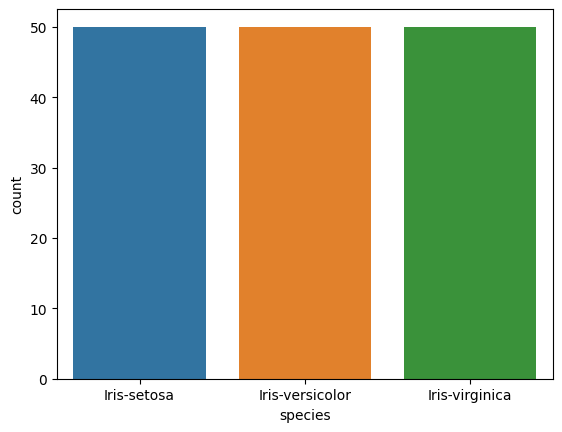

In [9]:
# Data Visualization
sns.countplot(df['species']);

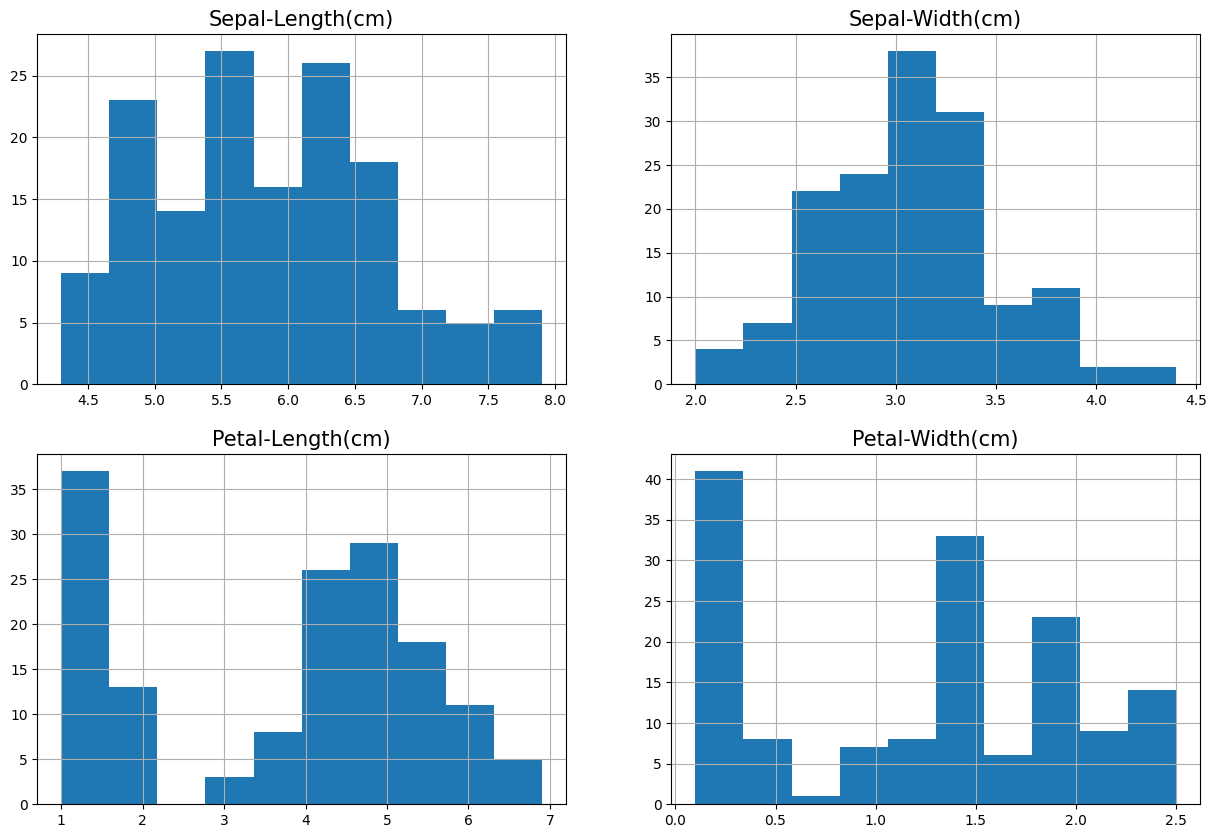

In [10]:
# Plotting the Histogram for the Flower Features
plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.title('Sepal-Length(cm)',fontsize=15)
plt.hist(df['sepal_length'])
plt.grid()

plt.subplot(2,2,2)
plt.title('Sepal-Width(cm)', fontsize=15)
plt.hist(df['sepal_width'])
plt.grid()

plt.subplot(2,2,3)
plt.title('Petal-Length(cm)', fontsize=15)
plt.hist(df['petal_length'])
plt.grid()

plt.subplot(2,2,4)
plt.title('Petal-Width(cm)', fontsize=15)
plt.hist(df['petal_width'])
plt.grid()

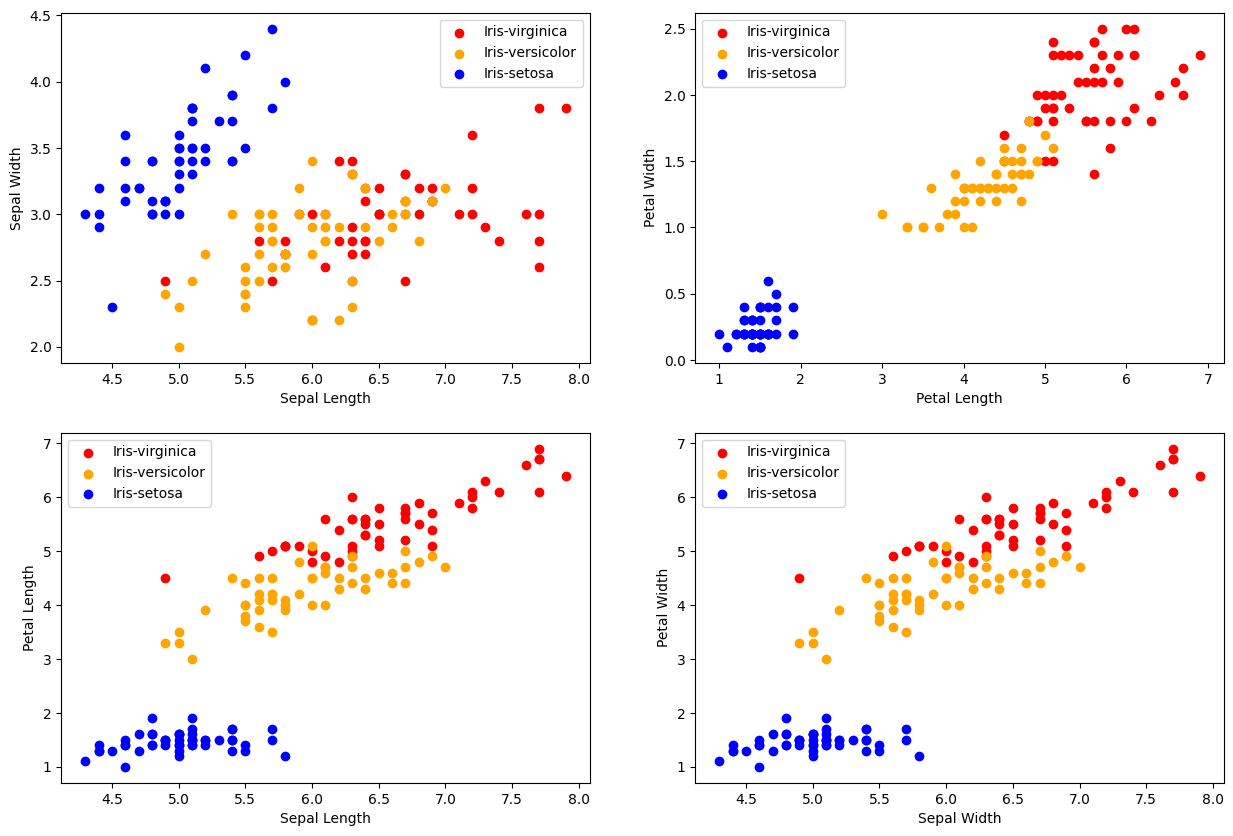

In [11]:
# Scatterplot for the Flower Features (Sepal and Petal Length, and Sepal and Petal Width)
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
plt.subplots(figsize=(15,10))
plt.subplot(2,2,1)
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

plt.subplot(2,2,2)
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

plt.subplot(2,2,3)
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

plt.subplot(2,2,4)
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [12]:
# Building the Classification Model
# Encoding the Species column using LabelEncoder
le=LabelEncoder()
df['Encoded_species']= le.fit_transform(df['species'])
df


,sepal_length,sepal_width,petal_length,petal_width,species,Encoded_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [13]:
print(df['Encoded_species'].value_counts())

0    50
1    50
2    50
Name: Encoded_species, dtype: int64


In [14]:
# Splitting the Dataset into Train and Test Data
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df[['Encoded_species']]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
# Training the model using Logistic Regression
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
#Accuracy of the Linear Regression Model
model_score=model.score(X_test,Y_test)*100
print("Accuracy:",model_score)

Accuracy: 96.66666666666667


In [18]:
a = model.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of species: {a} \n")
print(f"species Names: {predict_species}")

Label Encoded Prediction of species: [2 1 2 0 1 1 0 2 1 1 0 1 1 1 1 1 1 2 1 0 1 1 0 2 1 1 1 2 2 2] 

species Names: ['Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Virginica']


In [19]:
# Training the model using Support Vector Machine
svc = SVC()

svc.fit(X_train, Y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [20]:
svc.score(X_test, Y_test)*100

96.66666666666667

In [21]:
a = svc.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of species: {a} \n")
print(f"species Names: {predict_species}")

Label Encoded Prediction of species: [2 1 2 0 1 1 0 2 1 1 0 1 1 1 1 1 1 2 1 0 1 1 0 2 1 1 1 2 2 2] 

species Names: ['Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Virginica']


In [22]:
# Training the model using Decision Tree Classifier
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [24]:
model.score(X_test,Y_test)*100

90.0

In [25]:
a = model.predict(X_test)
species = ['Setosa', 'Versicolor', 'Virginica']
predict_species = []

for i in a:
    predict_species.append(species[i])

print(f"Label Encoded Prediction of species: {a} \n")
print(f"species Names: {predict_species}")

Label Encoded Prediction of species: [2 1 2 0 1 1 0 2 1 1 0 1 1 2 1 1 1 2 1 0 1 1 0 2 1 1 1 2 2 1] 

species Names: ['Virginica', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor']
